In [12]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import fnmatch
import pandas as pd
import threading
import math
from numpy import save, load

In [13]:
imagePatches = glob('.\data\**\*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

.\data\10253\0\10253_idx5_x1001_y1001_class0.png
.\data\10253\0\10253_idx5_x1001_y1051_class0.png
.\data\10253\0\10253_idx5_x1001_y1101_class0.png
.\data\10253\0\10253_idx5_x1001_y1151_class0.png
.\data\10253\0\10253_idx5_x1001_y1201_class0.png
.\data\10253\0\10253_idx5_x1001_y1251_class0.png
.\data\10253\0\10253_idx5_x1001_y1301_class0.png
.\data\10253\0\10253_idx5_x1001_y1351_class0.png
.\data\10253\0\10253_idx5_x1001_y1501_class0.png
.\data\10253\0\10253_idx5_x1001_y1551_class0.png


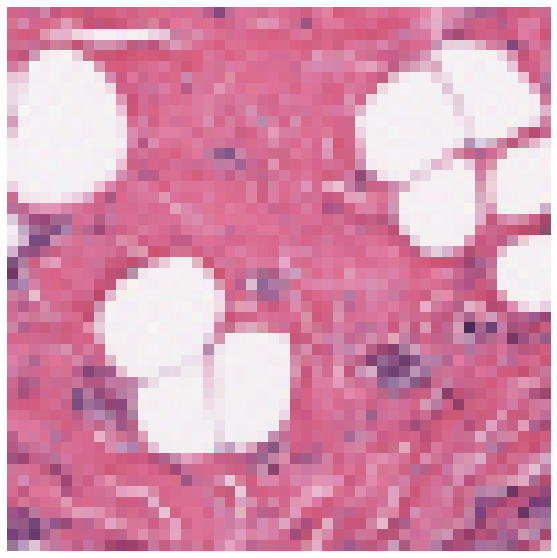

In [14]:
image_name = "./data/8863/1/8863_idx5_x1001_y801_class1.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

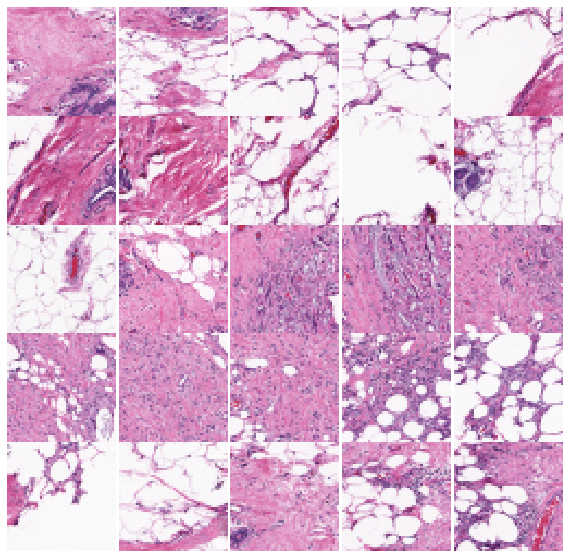

In [15]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [16]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)

In [17]:
def proc_images():
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in tqdm(imagePatches):
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [18]:
print(len(classZero))

198738


In [19]:
print(len(classOne))

78786


In [20]:
X,Y = proc_images()
save("images.npy", np.asarray(X))
save("labels.npy", np.asarray(Y))

100%|█████████████████████████████████████████████████████████████████████████| 277524/277524 [40:37<00:00, 113.85it/s]


In [21]:
X = load("images.npy")
Y = load("labels.npy")
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (277524, 50, 50, 3)
Y shape:  (277524,)


In [24]:
imgs0=[]
imgs1=[]
imgs0 = X[Y==0] # (0 = no IDC, 1 = IDC)
imgs1 = X[Y==1]

In [25]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)

Total number of images: 277524
Number of IDC(-) Images: 198738
Number of IDC(+) Images: 78786
Percentage of positive images: 28.39%
Image shape (Width, Height, Channels): (50, 50, 3)


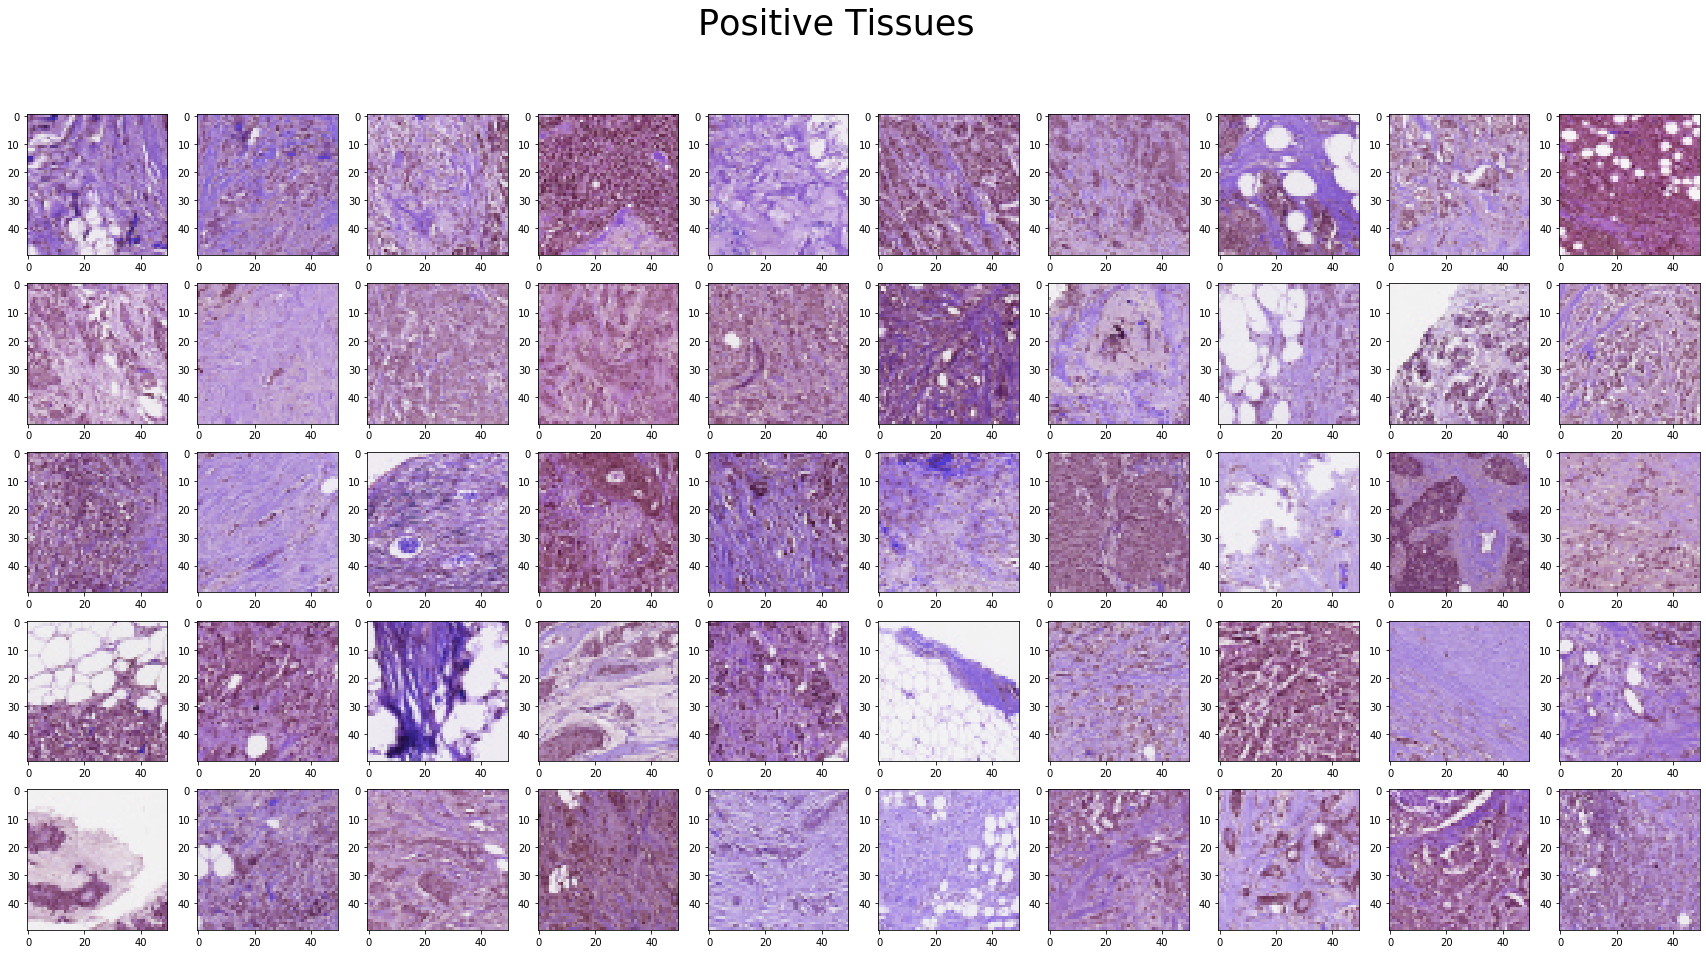

In [30]:
pos_idx = []
for i in range(len(Y)):
    if Y[i] == 1:
        pos_idx.append(i)
positive_tissue = np.random.choice(pos_idx, size=50, replace=False)

n_rows = 5
n_cols = 10

fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,15))
fig.suptitle('Positive Tissues', fontsize=35)
for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img = X[idx]
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)
        
plt.savefig('Positive Tissues.png')

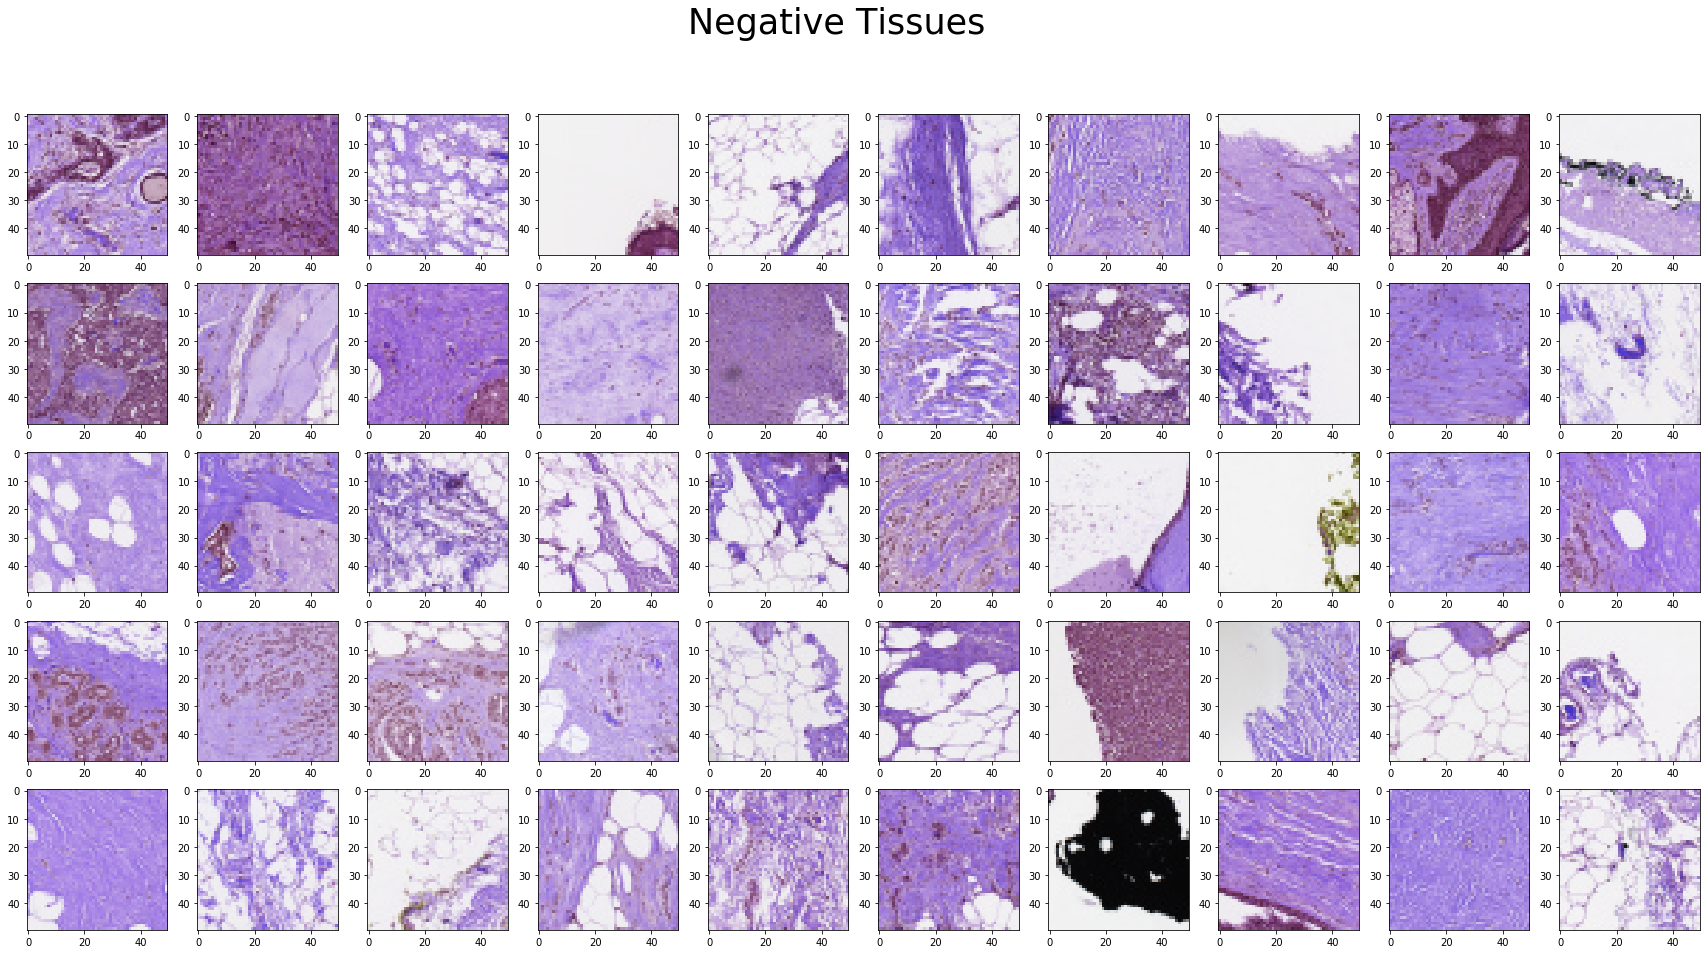

In [34]:
neg_idx = []
for i in range(len(Y)):
    if Y[i] == 0:
        neg_idx.append(i)

negative_tissue = np.random.choice(X.shape[0], size=100, replace=False)

n_rows = 5
n_cols = 10

fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,15))
fig.suptitle('Negative Tissues', fontsize=35)
for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = negative_tissue[col + n_cols*row]
        img = X[idx]
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)
        
plt.savefig('Negative Tissues.png')

In [35]:
def plotHistogram(a, idx):
    a = a[idx]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[idx]==1 else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

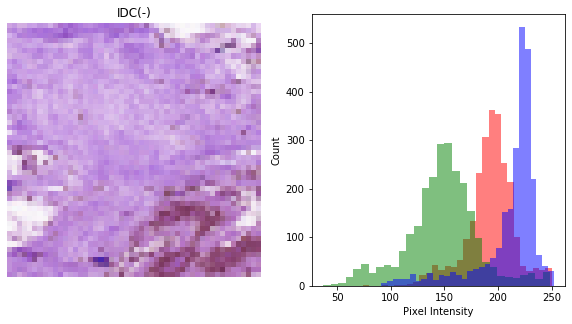

In [36]:
plotHistogram(X, 0)
plt.savefig("Negative Image Histogram")

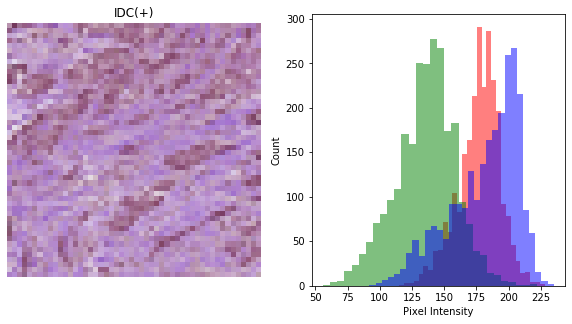

In [37]:
plotHistogram(X, 34346)
plt.savefig("Positive Image Histogram")

{0: 'IDC(-)', 1: 'IDC(+)'}


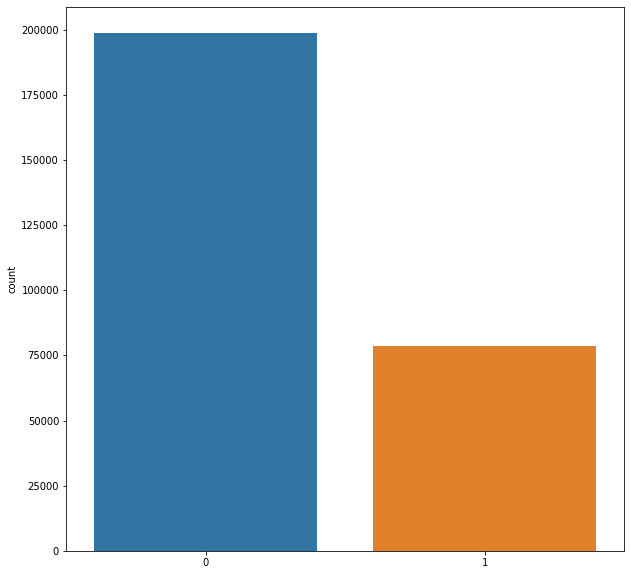

In [38]:
import seaborn as sns

dist = len(Y)

ax = sns.countplot(Y)
plot = ax.get_figure()
plot.savefig("Labels_Count.png")
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(dict_characters)